In [3]:
import sys
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2.extras

root_path = Path().resolve().parent.parent
sys.path.append(str(root_path))

from src.dataset.connection import connect_to_spotify_dataset
from src.dataset.connection import select

In [5]:
connection = connect_to_spotify_dataset()
if not connection:
    print("Connection Error")
tds = select(connection, "SELECT * FROM track_data") 

columns = [
    "id", "name", "popularity", "duration_ms", "explicit", "artists", "id_artists", "release_date",
    "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", 
    "instrumentalness", "liveness", "valence", "tempo", "time_signature","decade", "mood_index", "emotion_index", "party_index", "chill_index"
]
# Create the DataFrame
df = pd.DataFrame(tds, columns=columns)
df.head()

Connection successful
Connection closed.


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,decade,mood_index,emotion_index,party_index,chill_index
0,1mC0LEmjbCXjs8jjnYIjHw,Yo También Era Dichoso - Instrumental (Remaste...,0,170933,False,[Francisco Canaro],[2maQMqxNnlRrBrS1oAsrX9],1927-09-11,0.808,0.398,...,0.328,0.173,0.6680,114.891,4,1920,0.65600,4.37150,0.6030,0.8024
1,21010f0ucoaLEEn4khQKZb,T for Texas,1,208000,False,[Jimmie Rodgers],[0Y0ZlznP6vzTS1qAm5dvTN],1927,0.571,0.718,...,0.000,0.309,0.5650,78.849,4,1920,0.59740,1.61200,0.6445,0.6774
2,2fPzoKtGjXFDgzIOSAfrEq,Chapter 1 & Chapter 2.1 - Sprawy Sherlocka Hol...,0,128038,False,[Arthur Conan Doyle],[2AcBhTO6Q3zzUrfPKmskp3],1927-07-29,0.703,0.321,...,0.000,0.310,0.8030,87.746,3,1920,0.67660,5.69210,0.5120,0.7738
3,3B6gBlf64fMQY3sbkyFENu,Purple Daze,0,192332,False,[Cellular Project],[6OOyYaxY66YrMwusS1PIr6],1927,0.344,0.857,...,0.874,0.125,0.1580,140.669,4,1920,0.35360,1.95260,0.6005,0.2312
4,3KD6IGlsy0OmvQ5EZVSGwf,Iris: Inno al sole,0,231987,False,"[Pietro Mascagni, Staatskapelle Berlin]","[3Z5fRknMBBNfCw6pkgR9S8, 7vEPPI71V8dEHtEhPMAxWT]",1927-04-01,0.188,0.139,...,0.902,0.817,0.0387,74.178,3,1920,0.10355,5.63778,0.1635,0.9312


In [14]:
import torch
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA

small_train = df.iloc[:10000]

feature_cols = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'decade',"mood_index","emotion_index","party_index","chill_index"]

In [21]:
train_df = small_train[feature_cols]
train_df['mode'] = train_df['mode'].astype(int)
train_df['explicit'] = train_df['explicit'].astype(int)

/var/folders/qc/c98b3cz16bdfd88s6hww6clm0000gn/T/ipykernel_33921/4108326818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['mode'] = train_df['mode'].astype(int)
/var/folders/qc/c98b3cz16bdfd88s6hww6clm0000gn/T/ipykernel_33921/4108326818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['explicit'] = train_df['explicit'].astype(int)


popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
decade                int64
mood_index          float64
emotion_index       float64
party_index         float64
chill_index         float64
dtype: object

Silhouette Score after PCA: 0.0971


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/py

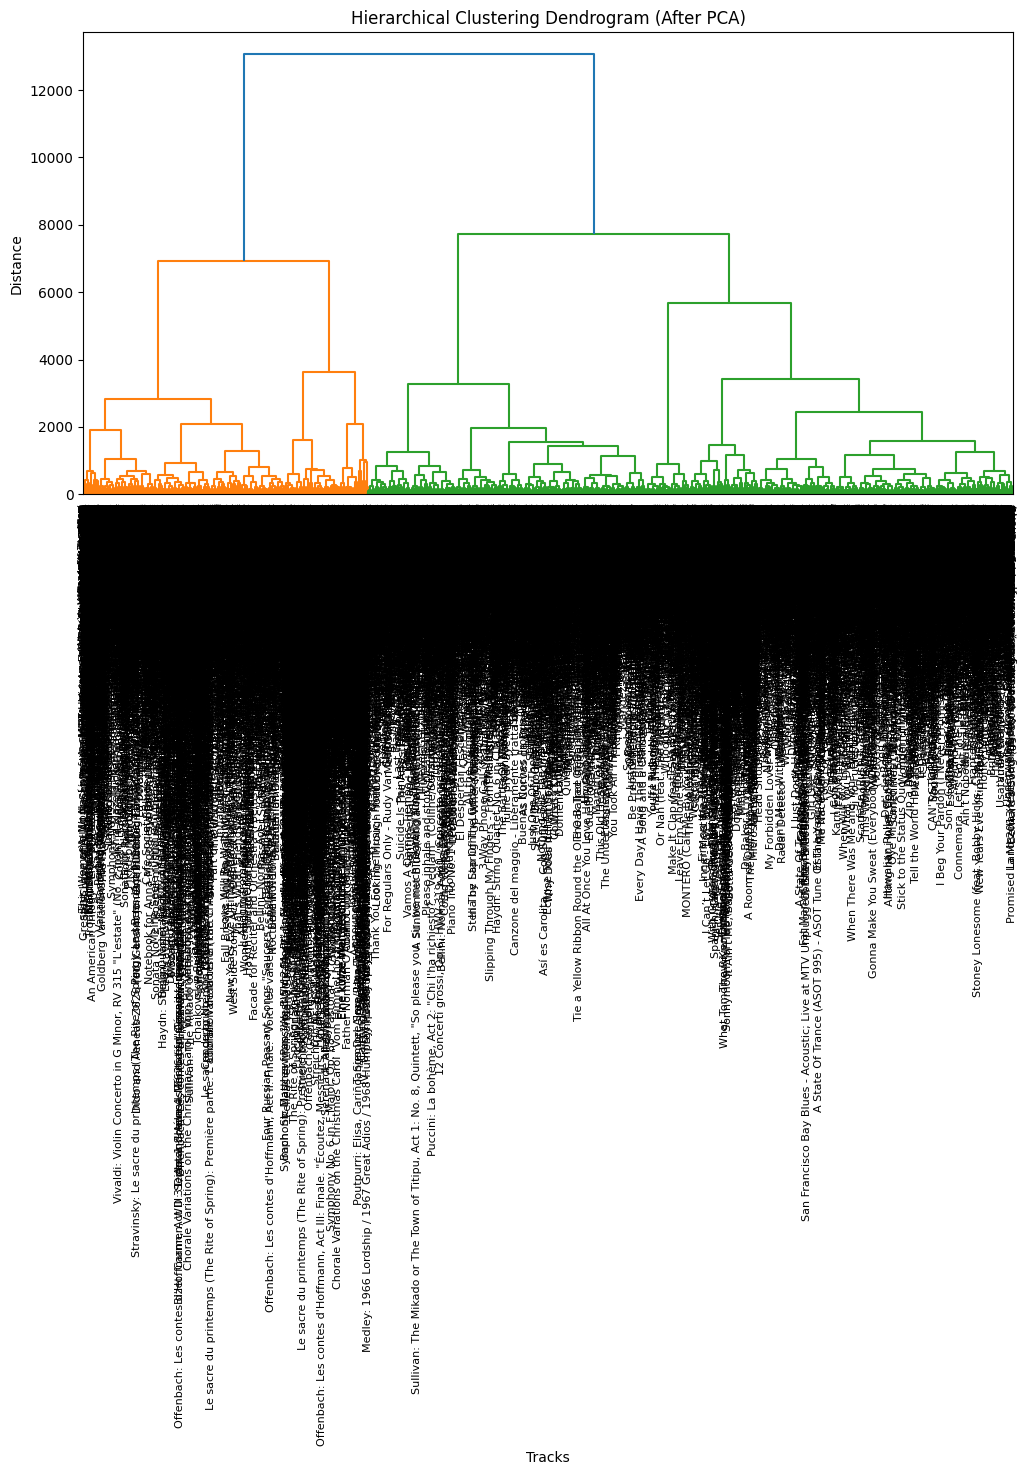

In [23]:
# Extract feature values as tensor
X = torch.tensor(train_df[feature_cols].values, dtype=torch.float32)

# Normalize features
scaler = StandardScaler()
X_scaled = torch.tensor(scaler.fit_transform(X), dtype=torch.float32)

# Apply PCA for dimensionality reduction
num_pca_components = 13
pca = PCA(n_components=num_pca_components)
X_pca = torch.tensor(pca.fit_transform(X_scaled), dtype=torch.float32)

# Compute pairwise Euclidean distances
distances = torch.cdist(X_pca, X_pca, p=2).numpy()

# Perform hierarchical clustering using Ward’s method
linkage_matrix = sch.linkage(distances, method='ward')

# Choose number of clusters (based on dendrogram analysis)
num_clusters = 6  # Adjust based on dendrogram inspection

# Assign cluster labels
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Compute Silhouette Score
sil_score = silhouette_score(X_pca.numpy(), cluster_labels)
print(f"Silhouette Score after PCA: {sil_score:.4f}")

# Plot dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, labels=small_train["name"].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram (After PCA)")
plt.xlabel("Tracks")
plt.ylabel("Distance")
plt.show()